# Example 1 - FEniCSx Intro

First we must create the mesh, a unit interval with 4 elements. Working in Jupyter, the program will not be parallelised, so we use the COMM_SELF MPI communicator.

In [1]:
from mpi4py import MPI
from dolfinx import mesh
domain = mesh.create_unit_interval(MPI.COMM_SELF, 4)

The finite element function space V must be defined, as well as the boundary data, $u(x) = x^2$

In [2]:
from dolfinx.fem import functionspace
V = functionspace(domain, ("Lagrange", 1))

In [3]:
from dolfinx import fem
u = fem.Function(V)
u.interpolate(lambda x: x[0]**2)

As a simple check to verify FEniCSx, node co-ordinates are accessed alongside the function values.

In [4]:
coords_flat = V.tabulate_dof_coordinates().ravel()
ndofs = u.x.array.size
gdim = coords_flat.size // ndofs
x = coords_flat.reshape(ndofs, gdim)[:, 0]

print("x:", x)
print("u:", u.x.array)

x: [-9.55263714e-18  2.50000000e-01  5.00000000e-01  7.50000000e-01
  1.00000000e+00]
u: [9.12528763e-35 6.25000000e-02 2.50000000e-01 5.62500000e-01
 1.00000000e+00]


We recover the array values, and note that the first is 9.12528763e-35, and not 0, due to floating-point round-off. The FE interpolation can be plotted against the exact values as below.

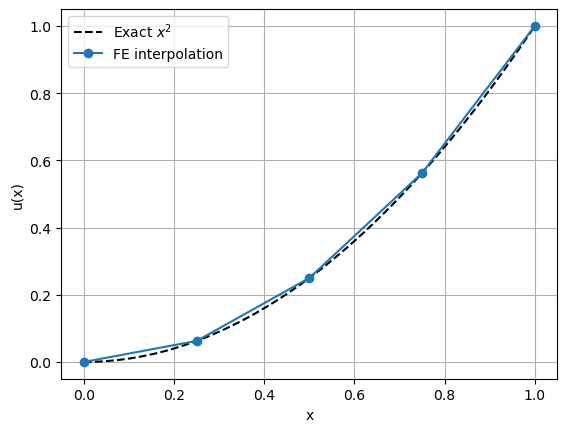

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Exact curve
xx = np.linspace(0, 1, 200)
uu = xx**2

# Plot
plt.plot(xx, uu, "k--", label="Exact $x^2$")
plt.plot(x, u.x.array, "o-", label="FE interpolation")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.grid(True)
plt.show()